# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis.

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

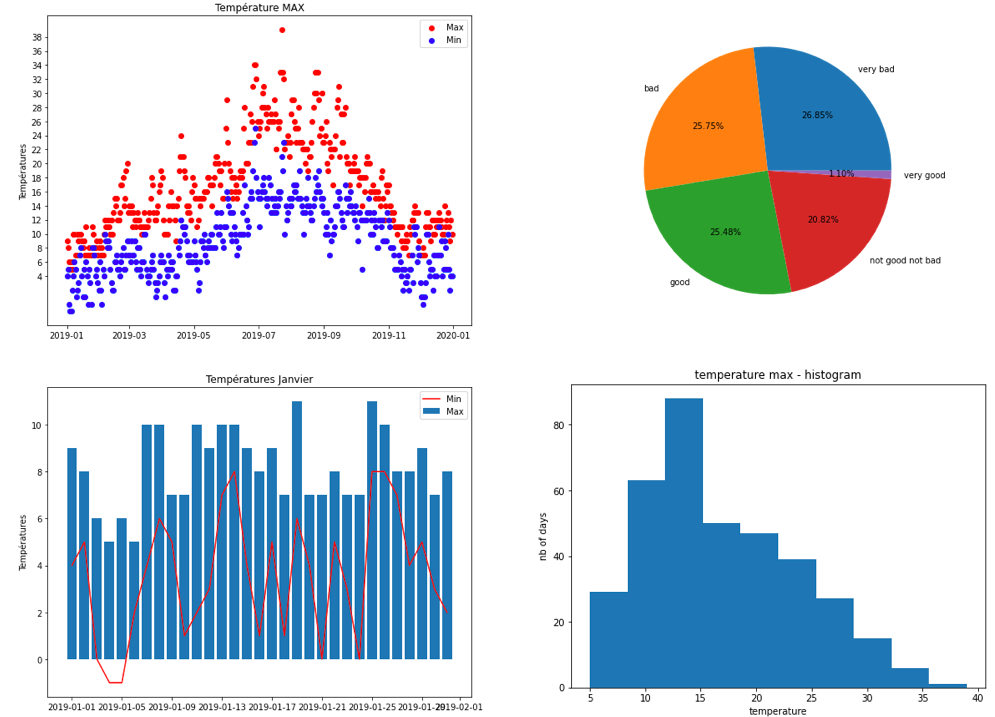

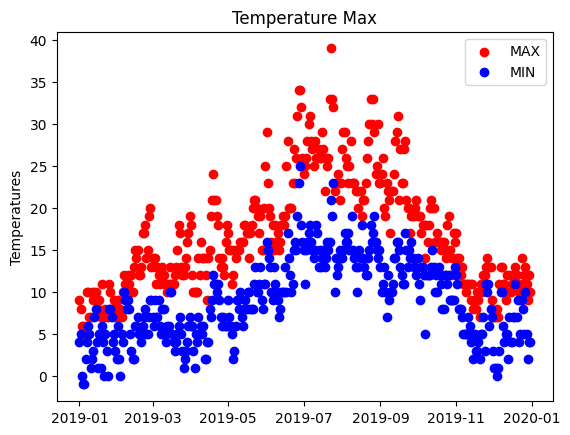

In [3]:
#For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c = "red", label = "MAX")
plt.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c = "blue", label = "MIN")
plt.title("Temperature Max")
plt.legend()
plt.ylabel("Temperatures")
plt.show()

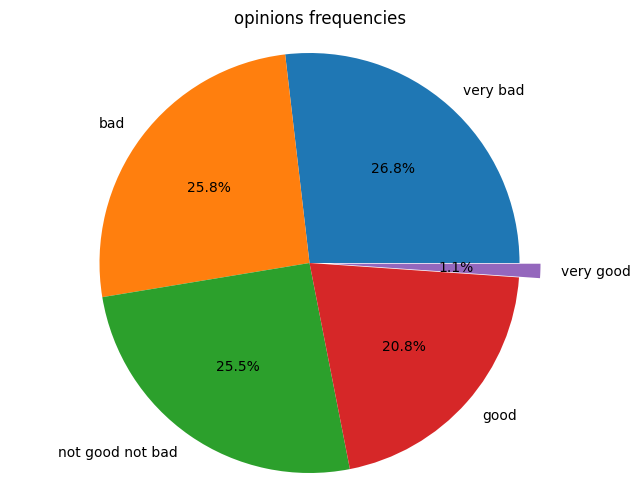

In [4]:
#For the top right one : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?

#sortir les valeurs par opinion
opinion_count = df_weather["OPINION"].value_counts()

#ce qui sera affiché dans le pie chart
labels = df_weather["OPINION"].unique()
values = opinion_count.to_numpy()

#obligé de définir l'explode
explode = [0 for _ in labels]
very_good_index = labels.tolist().index("very good")
explode[very_good_index] = 0.1

#construction du pie chart
plt.figure(figsize = (8, 6))
plt.pie(values, labels = labels, autopct = "%1.1f%%", explode = explode)
plt.axis("equal")
plt.title("opinions frequencies")
plt.show()

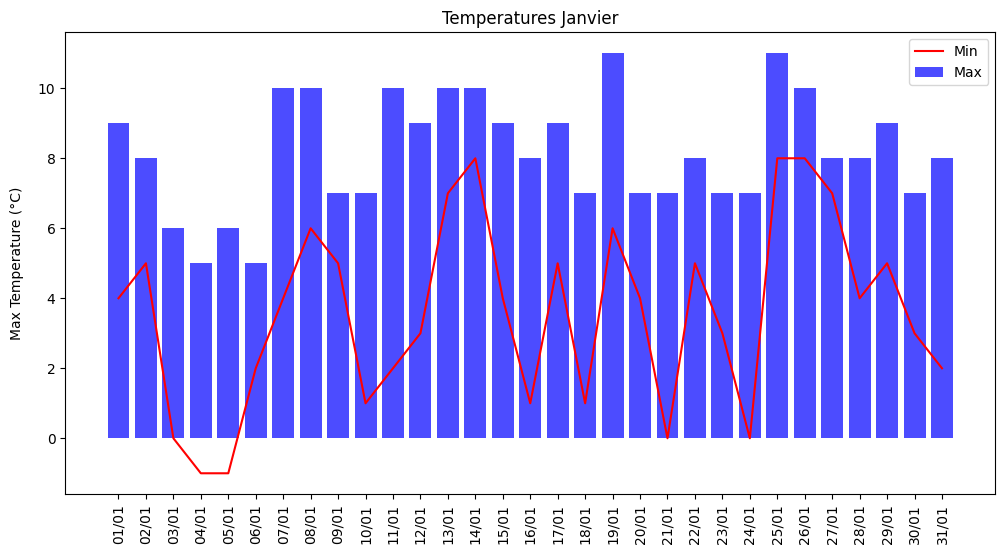

In [5]:
# Filtrer sur le mois de janvier
jan_data = df_weather.loc[df_weather['DATE'].dt.month == 1]

# les valeurs pour temp MAX et MIN
jan_max_temp = jan_data["MAX_TEMPERATURE_C"]
jan_min_temp = jan_data["MIN_TEMPERATURE_C"]
jan_dates = jan_data["DATE"].dt.strftime('%d/%m')  #du coup formater les dates

# pour avoir une seule figure
plt.figure(figsize=(12, 6))

# Max Temperature => en barres
plt.bar(jan_dates, jan_max_temp, color='blue', alpha=0.7, label='Max')

# Min Temperature => en courbe
plt.plot(jan_dates, jan_min_temp, color='red', label='Min')


plt.xticks(jan_dates, rotation = 90)
plt.ylabel('Max Temperature (°C)', labelpad=10)  # axe gauche

# Titre et légende
plt.title('Temperatures Janvier')
plt.legend(loc='upper right')


plt.show()

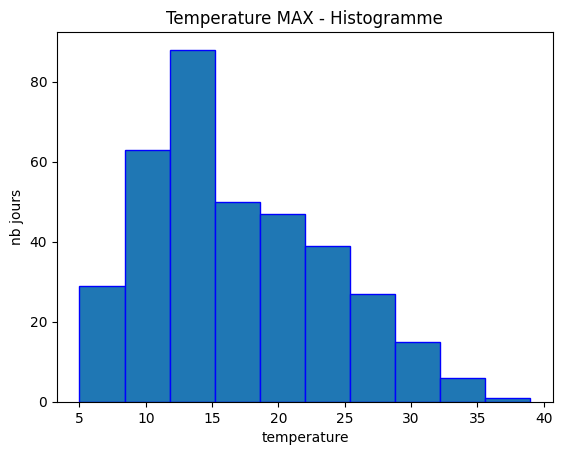

In [6]:
#For the bottom right one : an histogram with MAX Temperatures on X-axis

plt.hist(x = df_weather["MAX_TEMPERATURE_C"], edgecolor = "blue")
plt.xlabel("temperature")
plt.ylabel("nb jours")
plt.title("Temperature MAX - Histogramme")

plt.show()

In [7]:
# Complete the code below :
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

OPINION
very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: count, dtype: int64

## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) :
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

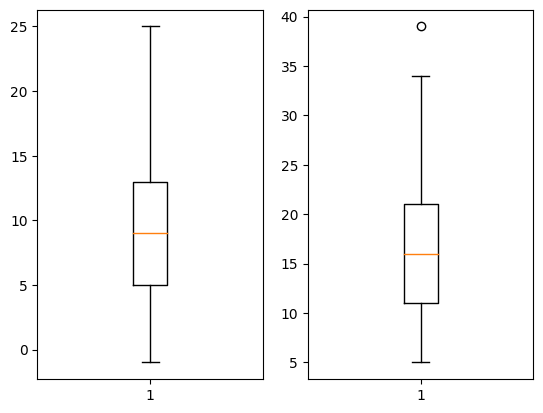

In [8]:
# Your code here :
box1 = plt.subplot(1,2,1)
box1.boxplot(df_weather["MIN_TEMPERATURE_C"])


box2 = plt.subplot(1,2,2)
box2.boxplot(df_weather["MAX_TEMPERATURE_C"])

plt.show()


Oui il y a des outliers pour les temperatures Max

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips :
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

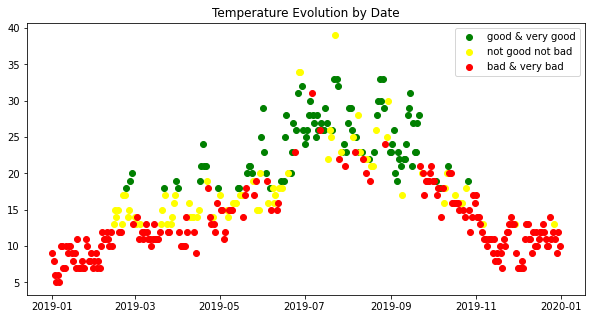

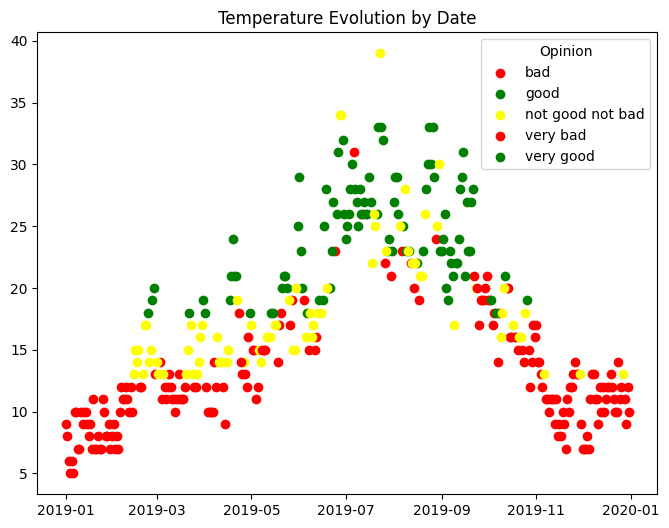

In [11]:
opinion_colors = {
    "good" : "green",
    "very good" : "green",
    "not good not bad" : "yellow",
    "bad" : "red",
    "very bad" : "red"
}

df_weather = df_weather.sort_values(by='DATE')
opinion_groups = df_weather.groupby('OPINION')

plt.figure(figsize = (8, 6))

for opinion, data in opinion_groups:
    x = data['DATE']
    y = data['MAX_TEMPERATURE_C']
    color = opinion_colors[opinion]
    plt.scatter(x, y, label=opinion, c=color)

plt.title('Temperature Evolution by Date')
plt.legend(title='Opinion')

plt.xticks()

plt.show()